# Task 4

### Load the data

In [42]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

loaded = np.load('endeavour.npz')
task4 = loaded["task4"]
patterns = task4.reshape(-1, 50, 50)

# Display the first few images
In order to understand what data we have it is a good practise to print the first few examples.

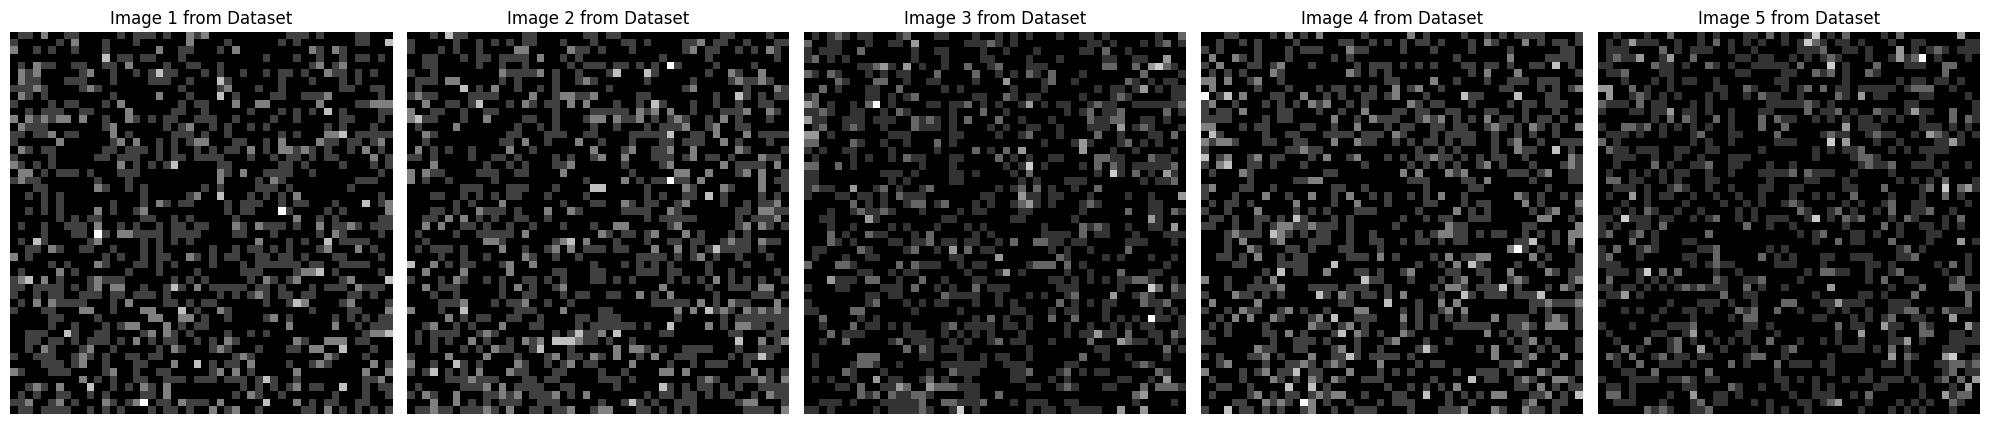

In [43]:
# Display the first few images
fig, axes = plt.subplots(1, 5, figsize=(20, 5))
for i, ax in enumerate(axes):
    ax.imshow(patterns[i], cmap='gray')
    ax.set_title(f"Image {i+1} from Dataset")
    ax.axis('off')
plt.tight_layout()
plt.show()

# 4.a) Compute the average 2D pattern’s total pixel value

In [44]:
flat_patterns = task4 
average_total_pixel_value = np.mean(np.sum(flat_patterns, axis=1))
print("Average 2D pattern’s total pixel value:", average_total_pixel_value)

Average 2D pattern’s total pixel value: 1251.047


# 4.b) Render the average 2D pattern

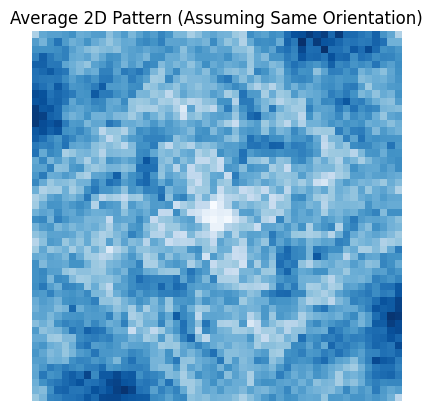

In [45]:
average_pattern = np.mean(flat_patterns, axis=0)
average_pattern_2d = average_pattern.reshape(50, 50)
plt.imshow(average_pattern_2d, cmap='Blues')
plt.title("Average 2D Pattern (Assuming Same Orientation)")
plt.axis('off')
plt.show()

# KMeans clustering 

Often case for KMeans clustering is to find a local minimum instead of the global. To evade from this case we run KMeans++ clustering multple times to be sure that we are close to that global minimum.

In [46]:
# Run KMeans multiple times and choose the one with best distortia score
best_kmeans = None
best_labels = None
best_distortia = float('inf')

n_runs = 5  # Number of times to run KMeans

for run in range(n_runs):
    kmeans = KMeans(n_clusters=4, init='k-means++', random_state=run).fit(flat_patterns)
    labels = kmeans.labels_
    
    # Calculate distortia score
    distortia = 0
    for i in range(4):
        cluster_points = flat_patterns[labels == i]
        centroid = kmeans.cluster_centers_[i].reshape(1, -1)
        distortia += np.sum(np.square(cluster_points - centroid))
    
    print(f"Run {run}: Distortia score = {distortia/1000}") # inertia/total(datapoints)
    
    # Determing the best clustering
    if distortia < best_distortia:
        best_kmeans = kmeans
        best_labels = labels
        best_distortia = distortia

print("Best Distortia score:", best_distortia/1000)

orientation_averages = []

for i in range(4):
    class_patterns = flat_patterns[best_labels == i]
    average_class_pattern = np.mean(class_patterns, axis=0)
    orientation_averages.append(average_class_pattern)
    

Run 0: Distortia score = 1257.3470492932374
Run 1: Distortia score = 1246.7911088619328
Run 2: Distortia score = 1246.7911088619328
Run 3: Distortia score = 1246.7911088619328
Run 4: Distortia score = 1246.7911088619326
Best Distortia score: 1246.7911088619326


# Visualize the average pattern for each cluster

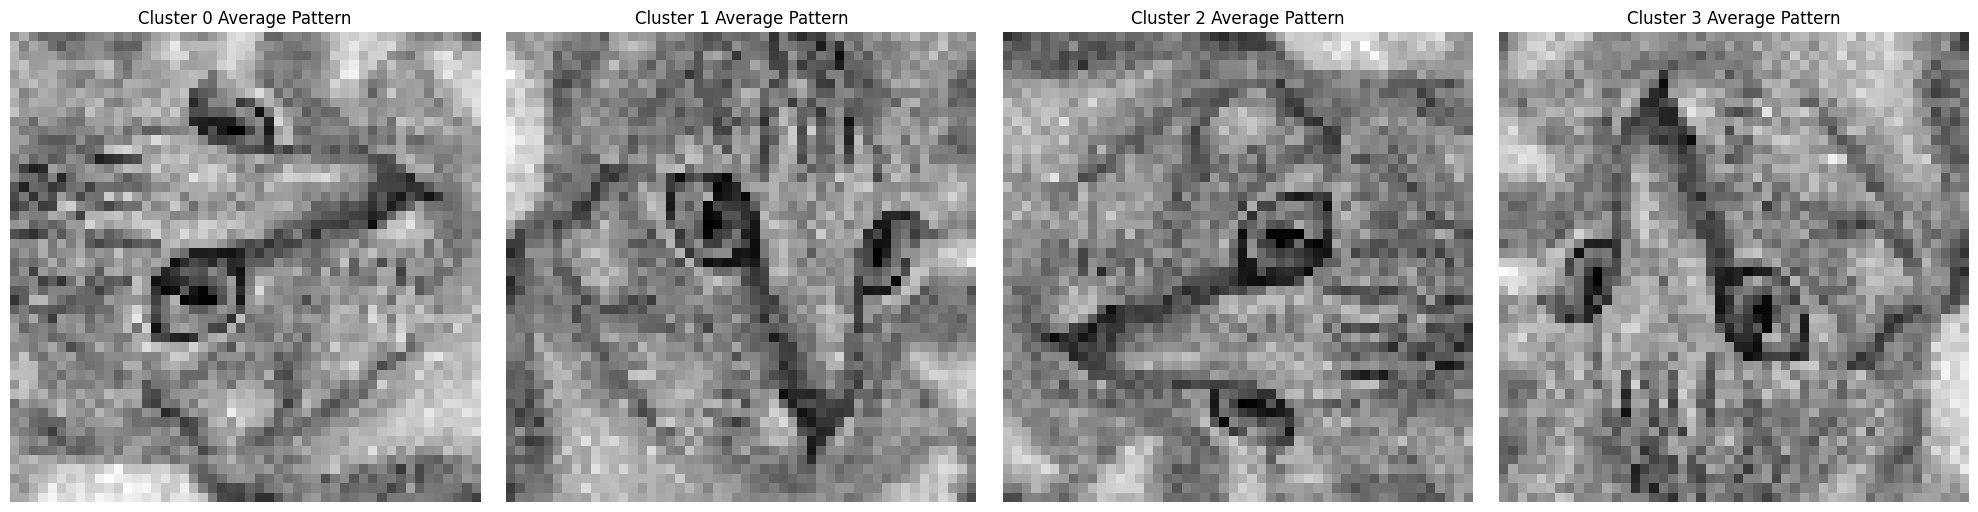

In [50]:
fig, axes = plt.subplots(1, 4, figsize=(20, 5))
for i, ax in enumerate(axes):
    average_class_pattern_2d = orientation_averages[i].reshape(50, 50)
    ax.imshow(average_class_pattern_2d, cmap='gray')
    ax.set_title(f"Cluster {i} Average Pattern")
    ax.axis('off')
plt.tight_layout()
plt.show()

# Determine rotation for each cluster
Now we can clearly see that the order of orientation is random.
So now we should determine the rotation degrees again using the master image

In [48]:
reference_pattern = flat_patterns[0].reshape(50, 50)
rotations = [reference_pattern,
             np.rot90(reference_pattern, k=1),
             np.rot90(reference_pattern, k=2),
             np.rot90(reference_pattern, k=3)]

# Calculating Euclidian distances and determine best matching rotation for each cluster
rotation_order = [-1] * 4 
for i, avg in enumerate(orientation_averages):
    avg_2d = avg.reshape(50, 50)
    min_dist = float('inf')
    best_rotation = -1
    for j, rot in enumerate(rotations):
        dist = np.sum((avg_2d - rot) ** 2)
        if dist < min_dist:
            min_dist = dist
            best_rotation = j
    rotation_order[i] = best_rotation
    
# Verify if each rotation (0°, 90°, 180°, 270°) is assigned only once
if len(set(rotation_order)) != 4:
    raise ValueError("Rotation determination failed. Please re-run or adjust the algorithm.")


# Visualize the results
Now, after determing each cluster's rotation we can plot the sorted and ordered clusters' averages. 
Also, we will print which cluster correspondents to which degree.
Finally, we are printing how many samples are in every cluster. This could be essential for 7th and 6th problem. And testing the actual formula from 5f)

Cluster 0 corresponds to 90° Rotation
Cluster 1 corresponds to 0° Rotation
Cluster 2 corresponds to 270° Rotation
Cluster 3 corresponds to 180° Rotation
0° Rotation: 254 elements
90° Rotation: 260 elements
180° Rotation: 250 elements
270° Rotation: 236 elements


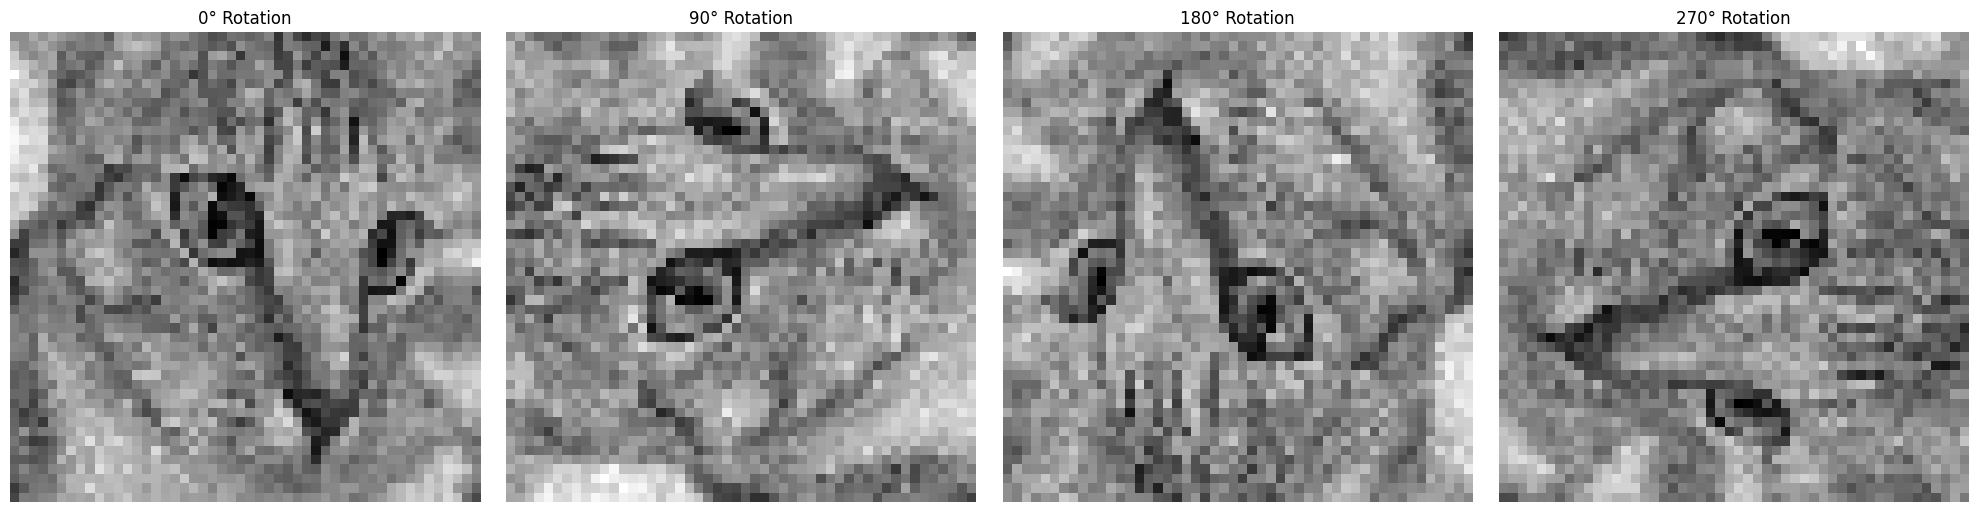

In [49]:
#  Which cluster correspondents to which degree
rotation_titles = ["0° Rotation", "90° Rotation", "180° Rotation", "270° Rotation"]
for i, rotation in enumerate(rotation_order):
    print(f"Cluster {i} corresponds to {rotation_titles[rotation]}")
    
# Number of elements by cluster
cluster_counts = np.bincount(best_labels)
rotation_to_cluster = {rotation_order[i]: i for i in range(4)}
sorted_rotations = sorted(rotation_to_cluster.items())

for rotation, cluster_num in sorted_rotations:
    print(f"{rotation_titles[rotation]}: {cluster_counts[cluster_num]} elements")

# Sorting the clusters
reordered_averages = [orientation_averages[rotation_order.index(i)] for i in range(4)]

# Visualizing average's for each cluster
fig, axes = plt.subplots(1, 4, figsize=(20, 5))

for i, ax in enumerate(axes):
    class_pattern_2d = reordered_averages[i].reshape(50, 50)
    ax.imshow(class_pattern_2d, cmap='gray')
    ax.set_title(rotation_titles[i])
    ax.axis('off')

plt.tight_layout()
plt.show()